**STAT40800 Data Programming with Python (online)**

**Final project**

*[K.Saketh Sai Nigam(22201204)]*

***LOADING THE PAKAGES REQUIRED FOR THE PROJECT***

In [236]:
# Load in necessary packages
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import statistics
from sklearn.cluster import DBSCAN

**=====================================================================================**

**QUESTION-1**

**(a) Load the neurons group 1.csv dataset into Python as a pandas DataFrame.**

In [2]:
#Loading the DataSet 'neurons_group_1.csv'
GroupData1 = pd.read_csv("/Users/saketh/Desktop/neurons_group_1.csv")

**b) Inspect the data. How many neurons are included in this dataset? How many different measurements are included? Does this dataset contain any missing values?**

**Inspection of the Data**

In [3]:
#Printing the top 5 rows in the DataSet 'neurons_group_1.csv'
GroupData1.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,484775243,0.195628,90.3529,548.798070,257.109717,128.269219,3658.629571,2252.681880,115.626135
1,485996843,0.457635,87.0383,717.408343,199.214267,430.635072,4158.819949,5944.196007,730.014704
2,486041253,0.295455,75.3286,584.083922,386.076695,502.033948,2667.618389,2472.795020,197.063796
3,491119181,0.414033,89.0718,284.641670,239.492610,383.828302,1543.941010,2008.838025,237.466517
4,491119245,0.201323,44.5237,302.038542,323.493562,120.229052,1621.871325,1027.220686,54.521240


*The above data has few set of measurements of neuron which are **id,average_diameter,overall_depth,overall_height,overall_width,soma_surface	total_length,total_surface,total_volume** in the **'neurons_group_1.csv'** file*

**No:of Neurons in the Dataset**

In [4]:
#Printing the no:of neurons in the data
print('The Total No:of Neurons in the Dataset: ', len(GroupData1))

The Total No:of Neurons in the Dataset:  311


*(There are total **311** neurons data in the loaded DataSet **'neurons group 1.csv'**)*

**Measurements Included in Dataset**

In [5]:
#printing the measurements of neuron in the given dataset with their count
index = 0
for columnname in GroupData1.columns:
    index = index+1
    print(index,columnname)

1 id
2 average_diameter
3 overall_depth
4 overall_height
5 overall_width
6 soma_surface
7 total_length
8 total_surface
9 total_volume


*(The above are the **9** measurements of neurons in the dataset)*

**Missing values in Dataset**

In [6]:
#Missing values in the data
print(GroupData1.isna())
print()
print(GroupData1.isna().sum())

        id  average_diameter  overall_depth  overall_height  overall_width  \
0    False             False          False           False          False   
1    False             False          False           False          False   
2    False             False          False           False          False   
3    False             False          False           False          False   
4    False             False          False           False          False   
..     ...               ...            ...             ...            ...   
306  False             False          False           False          False   
307  False             False          False           False          False   
308  False             False          False           False          False   
309  False             False          False           False          False   
310  False             False          False           False          False   

     soma_surface  total_length  total_surface  total_volume  


*(As the sum of all the missing values are 0, this means there are no missing values in the dataset)*

**(c) Perform an exploratory data analysis, creating both numerical and graphical sum- maries of the data. Discuss and interpret your results.**

**NUMERICAL SUMMARY:**

In [7]:
#Numerical Summary
GroupData1.describe()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
count,3.110000e+02,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,5.885866e+08,0.421175,91.967024,523.516774,320.548089,361.849689,3792.940198,5492.737135,808.488483
std,8.490396e+07,0.159435,35.658760,299.256684,124.039953,253.912293,2775.993259,5719.713426,1190.466808
min,4.847752e+08,0.053899,22.680000,82.836871,49.173247,2.895610,251.987893,402.242787,4.309842
25%,4.961239e+08,0.322128,64.574450,328.964661,233.480547,176.194233,2237.031837,2253.626506,197.071679
50%,5.912744e+08,0.415613,86.212200,469.151885,291.532148,311.568275,2946.858866,3636.755377,407.180171
75%,6.568502e+08,0.527572,115.566350,651.885452,392.534334,478.796933,4085.692910,5895.663836,833.681728
max,8.460831e+08,1.156730,183.960000,1928.118350,827.752239,1283.720986,15697.415190,37182.284100,8482.061401


**Interpreting the Numerical Summary of Neuron measurements:-**

***AVERAGE DIAMETER:*** 

There are 311 values in AVERAGE DIAMETER. The AVERAGE DIAMETER's mean is roughly 0.421175 and the standard deviation is 0.159435. The range of the highest value is 1.156730 since the minimum and maximum values are 0.053899 and 1.156730 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. AVERAGE DIAMETER's 25%, 50%, and 75% values are 0.322128, 0.415613,0.527572.

***OVERALL DEPTH:***

There are 311 values in OVERALL DEPTH. The OVERALL DEPTH's mean is roughly 91.967024 and the standard deviation is 35.658760. The range of the highest value is 183.960000 since the minimum and maximum values are 22.680000 and 183.960000 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. OVERALL DEPTH's 25%, 50%, and 75% values are 64.574450, 86.212200,115.566350. 

***OVERALL HEIGHT:***

There are 311 values in OVERALL HEIGHT. The OVERALL HEIGHT's mean is roughly 523.516774 and the standard deviation is 299.256684. The range of the highest value is 1928.118350 since the minimum and maximum values are 82.836871 and 1928.118350 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. OVERALL HEIGHT's 25%, 50%, and 75% values are 328.964661, 469.151885,651.885452. 

***OVERALL WIDTH:***

There are 311 values in OVERALL WIDTH. The OVERALL WIDTH's mean is roughly 320.548089 and the standard deviation is 124.039953. The range of the highest value is 827.752239 since the minimum and maximum values are 49.173247 and 827.752239 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. OVERALL WIDTH's 25%, 50%, and 75% values are 49.173247, 233.480547,392.534334. 

***SOMA SURFACE:***

There are 311 values in SOMA SURFACE. The SOMA SURFACE's mean is roughly 361.849689 and the standard deviation is 253.912293. The range of the highest value is 1283.720986 since the minimum and maximum values are 2.895610 and 1283.720986 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. SOMA SURFACE's 25%, 50%, and 75% values are 176.194233, 311.568275,478.796933. 

***TOTAL LENGTH:***

There are 311 values in TOTAL LENGTH. The TOTAL LENGTH's mean is roughly 3792.940198 and the standard deviation is 2775.993259. The range of the highest value is 15697.415190 since the minimum and maximum values are 251.987893 and 15697.415190 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. TOTAL LENGTH's 25%, 50%, and 75% values are 2237.031837, 2946.858866,4085.692910.

***TOTAL SURFACE:***

There are 311 values in TOTAL SURFACE. The TOTAL SURFACE's mean is roughly 5492.737135 and the standard deviation is 5719.713426. The range of the highest value is 37182.284100 since the minimum and maximum values are 402.242787 and 37182.284100 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. TOTAL SURFACE's 25%, 50%, and 75% values are 2253.626506, 3636.755377,5895.663836.

***TOTAL VOLUME:***

There are 311 values in TOTAL VOLUME. The TOTAL VOLUME's mean is roughly 808.488483 and the standard deviation is 1190.466808. The range of the highest value is 8482.061401 since the minimum and maximum values are 4.309842 and 8482.061401 respectively. Additionally, the summary gives the percentiles (25%, 50%, and 75%). Lower quartile refers to the 25% of the dataset that is comprised of the first 25%. The higher quartiles, which make up 75% of the data, are referred to as the upper quartiles, while the median, which is the center number, is referred to as 50%. TOTAL VOLUME's 25%, 50%, and 75% values are 197.071679, 407.180171,833.681728.

**GRAPHICAL SUMMARY:**

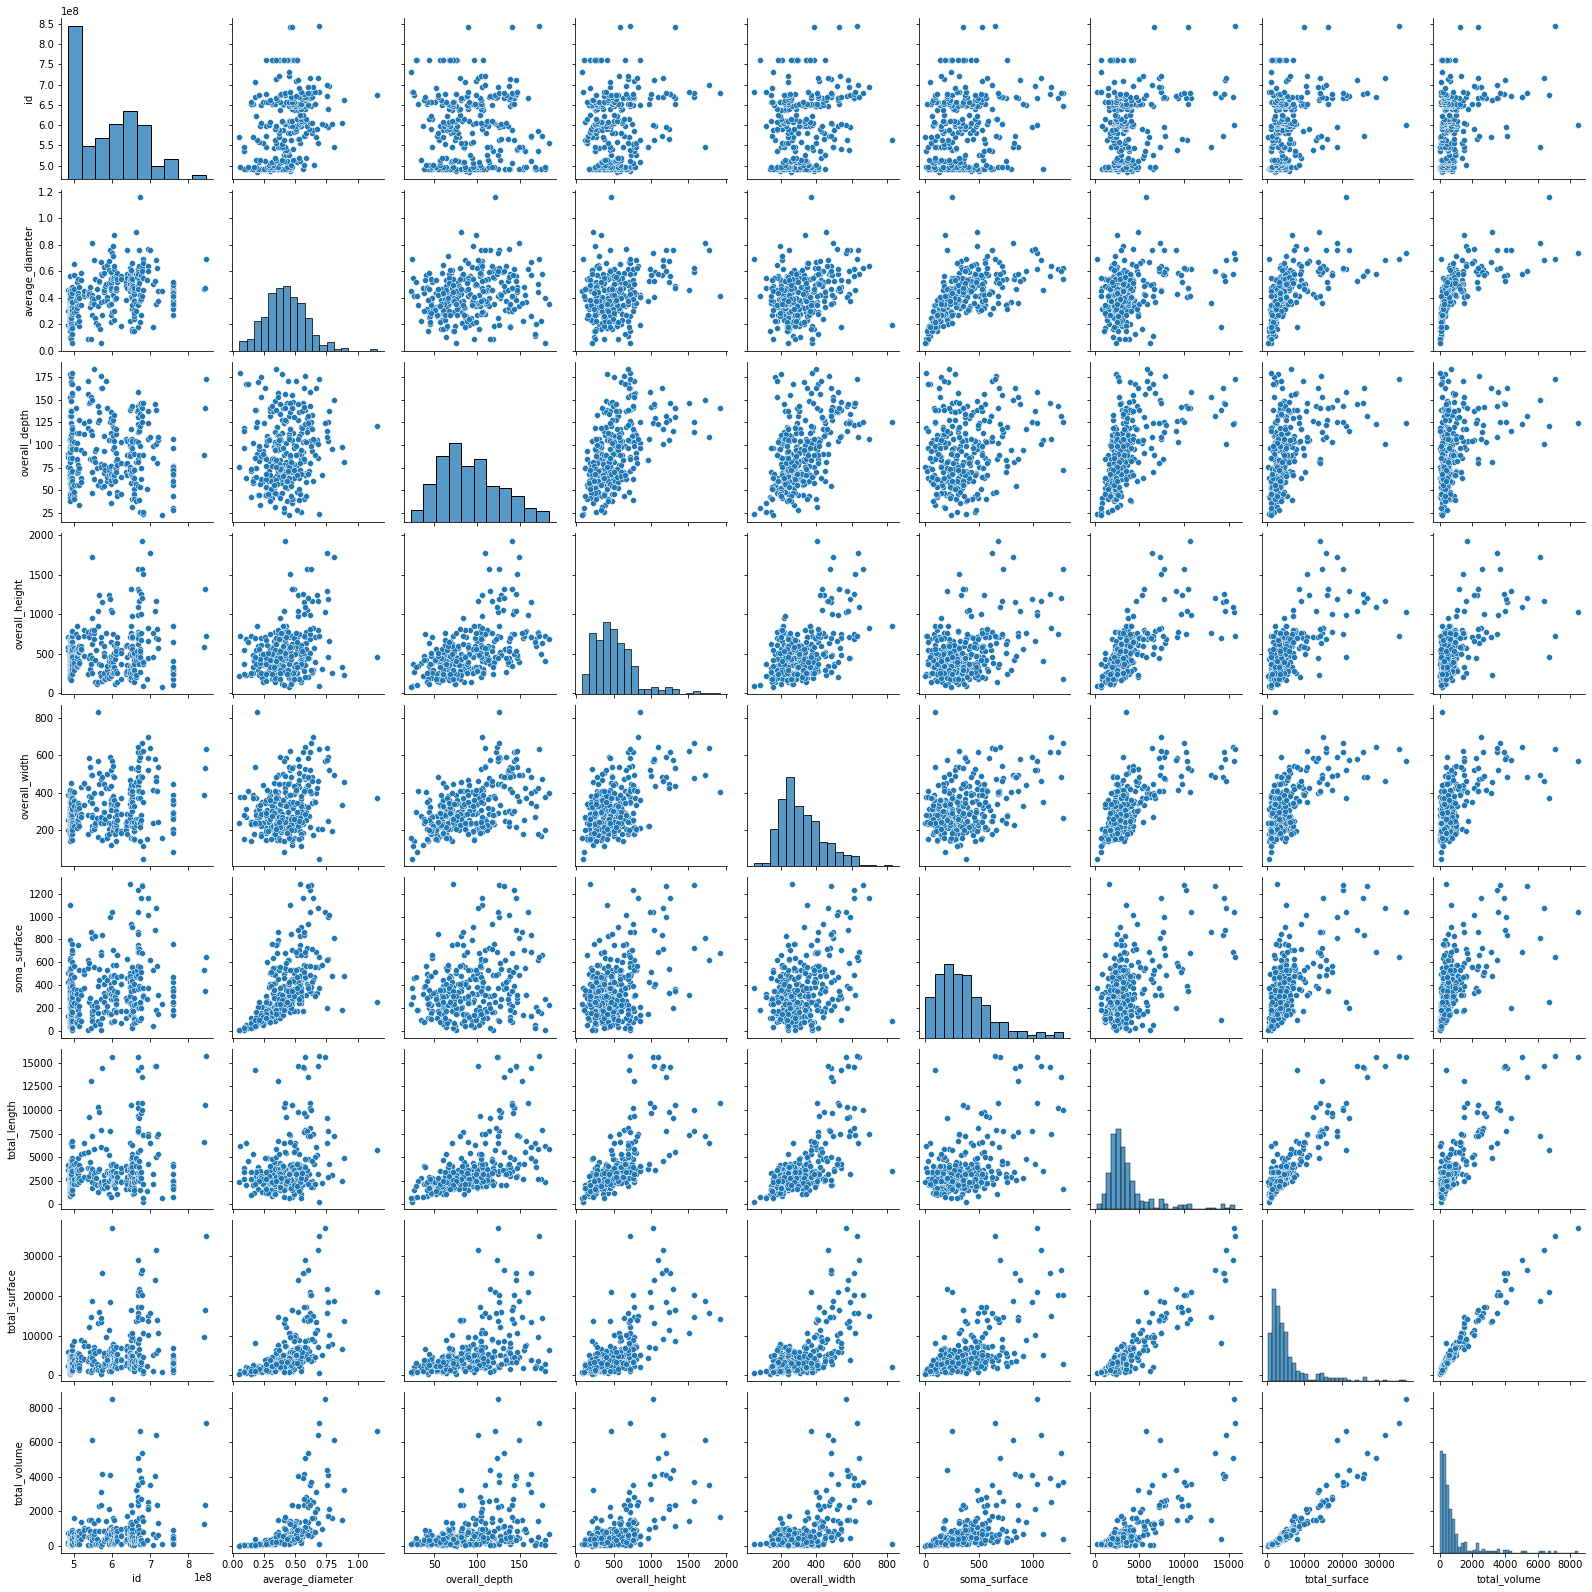

In [8]:
#Graphical Summary
graphicalsummaryofGroupData1 = GroupData1
sns.pairplot(graphicalsummaryofGroupData1)

**Interpreting the Graphical Summary of the Neuron Measurements:-**

In a dataset, pairwise relationships are plotted using a pairplot. Each variable in the data will be shared in a single row and column on the y-axis and a single column on the x-axis thanks to the pairplot function's creation of a grid of axes. Thus, plots are produced, as above. It makes use of a set of Neurons data. Nine meteorological measurements are included in the data set: id, average_diameter, overall_depth, overall_height, overall_width, soma_surface, total_length, total_surface and total_volume. The grid above displays a map of the data. There are 9 measurements, hence a 9x9 plot is produced. We may use pairplot to examine the non-diagonal linear relationship and diagonal distribution of these measurements. We receive the results as a 9X9 shape based on the various values of each measurement. We get different shapes of Barplots in the diagonal area of the 9X9 matrix.

**=====================================================================================**

**QUESTION-2**

**(a) Load the neurons group 2.csv dataset into Python as a pandas DataFrame.**

In [9]:
##Loading the DataSet 'neurons_group_2.csv'
GroupData2 = pd.read_csv("/Users/saketh/Desktop/neurons_group_2.csv")

**(b) Inspect the data. How many neurons are included in this dataset? Are the measurements the same as those in neurons group 1.csv?**

**Inspection the data**

In [10]:
#Printing the top 5 rows in the DataSet 'neurons_group_2.csv'
GroupData2.head()

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume
0,397905347,0.316091,117.5429,585.602322,287.122628,268.777679,3498.090031,3523.606841,306.290931
1,491119234,0.331268,81.9012,461.280515,275.146120,551.788645,2008.302439,2097.688550,188.431435
2,491119269,0.139015,57.5697,324.422347,280.851229,50.092109,1774.258366,776.076427,25.733000
3,491119394,0.230412,76.0357,368.298267,251.377567,244.457685,1650.188964,1198.531518,75.823080
4,491119419,0.321163,98.8344,417.890620,193.590563,252.423672,2066.369729,2085.789861,180.446414


*The above data has few set of measurements of neuron which are **id,average_diameter,overall_depth,overall_height,overall_width,soma_surface	total_length,total_surface,total_volume** in the **'neurons_group_2.csv'** file*

**Are the measurements the same as those in neurons group 1.csv?**

In [11]:
#Printing the Shapes of the Datasets 'neurons_group_1.csv' and 'neurons_group_2.csv'
print('The Dimensions of the GroupData1(neurons_group_1.csv) dataset is: ',GroupData1.shape)
print('The Dimensions of the GroupData1(neurons_group_2.csv) dataset is: ',GroupData2.shape)

The Dimensions of the GroupData1(neurons_group_1.csv) dataset is:  (311, 9)
The Dimensions of the GroupData1(neurons_group_2.csv) dataset is:  (390, 9)


*So, from above it is clear that **'neurons_group_1.csv'** has **311** set of Neurons list with **9** measurements of neurons and **'neurons_group_2.csv'** has **390** set of Neurons list with **9** measurements of neurons. We can conclude that, **'neurons_group_1.csv'** and **'neurons_group_2.csv'** has **SAME** measurements of neurons*

**(c) Perform a t-test, for each of the measurements, to test whether any of the neuron properties differ between the group 1 and group 2. Use a significance level of α = 0.01. Display the t-score and p-value for each measurement. Clearly state the conclusion of your tests and explain your reasoning.**

In [51]:
#Significance level given in Question
alpha = 0.01

#Function to calculate 't-statistics' and 'P-Value'
def TscoresnPvalues(l,o,alpha,ColumnName):
    t,p = stats.ttest_ind(l, o)
    
    print(ColumnName, ' the T-SCORE and P-VALUE are')
    print()
    print('T-Statistics: ',t, ' P-value: ', p,' alpha: ', alpha)
    
    if(p>alpha):
        print('As', p ,'(P-Value)', 'is higher than ', alpha ,'(Alpha), we Fail to Reject HO!')
    else:
        print('As', p ,'(P-Value)', 'is lower than ', alpha , '(Alpha), we Reject HO!')
        
    print('************************************************************')

#Calling the above function for each variable of the Dataset
TscoresnPvalues(GroupData1.iloc[:,1:2],GroupData2.iloc[:,1:2],alpha,'AVERAGE DIAMETER: ')
 
TscoresnPvalues(GroupData1.iloc[:,2:3],GroupData2.iloc[:,2:3],alpha,'OVERALL DEPTH: ')

TscoresnPvalues(GroupData1.iloc[:,3:4],GroupData2.iloc[:,3:4],alpha,'OVERALL HEIGHT: ')

TscoresnPvalues(GroupData1.iloc[:,4:5],GroupData2.iloc[:,4:5],alpha,'OVERALL WIDTH: ')

TscoresnPvalues(GroupData1.iloc[:,5:6],GroupData2.iloc[:,5:6],alpha,'SOMA SURFACE: ')

TscoresnPvalues(GroupData1.iloc[:,6:7],GroupData2.iloc[:,6:7],alpha,'TOTAL LENGTH: ')

TscoresnPvalues(GroupData1.iloc[:,7:8],GroupData2.iloc[:,7:8],alpha,'TOTAL SURFACE: ')

TscoresnPvalues(GroupData1.iloc[:,8:9],GroupData2.iloc[:,8:9],alpha,'TOTAL VOLUME: ')


AVERAGE DIAMETER:   the T-SCORE and P-VALUE are

T-Statistics:  [-1.19700758]  P-value:  [0.2317094]  alpha:  0.01
As [0.2317094] (P-Value) is higher than  0.01 (Alpha), we Fail to Reject HO!
************************************************************
OVERALL DEPTH:   the T-SCORE and P-VALUE are

T-Statistics:  [-1.18572309]  P-value:  [0.23613458]  alpha:  0.01
As [0.23613458] (P-Value) is higher than  0.01 (Alpha), we Fail to Reject HO!
************************************************************
OVERALL HEIGHT:   the T-SCORE and P-VALUE are

T-Statistics:  [0.58603484]  P-value:  [0.55804127]  alpha:  0.01
As [0.55804127] (P-Value) is higher than  0.01 (Alpha), we Fail to Reject HO!
************************************************************
OVERALL WIDTH:   the T-SCORE and P-VALUE are

T-Statistics:  [-0.92319204]  P-value:  [0.35622569]  alpha:  0.01
As [0.35622569] (P-Value) is higher than  0.01 (Alpha), we Fail to Reject HO!
****************************************************

*The values of the T-Score and P-values of different measurements are compared with the Alpha value given in the question. So, on comparing the P-value with Alpha we will come to a decision of Rejection of H0! or Fail to Rejection of H0!*

**=====================================================================================**

**QUESTION-3**

**(a) Load the neurons additional measurements.csv into Python and combine all
three datasets into a single DataFrame.**

**Load the neurons additional measurements.csv into Python**

In [13]:
#Loading the 'neurons_additional_measurements.csv' Dataset
GroupData3 = pd.read_csv("/Users/saketh/Desktop/neurons_additional_measurements.csv")

**combine all three datasets into a single DataFrame.**

In [52]:
#Combining 'neurons_group_1.csv', 'neurons_group_2.csv' and 'neurons_additional_measurements.csv' datasets
D1 = pd.concat([GroupData1,GroupData2])
GroupData = pd.merge(D1,GroupData3, on="id", how="outer")

**(b) Comment on the dimensions of the combined dataset. Are all of the neurons from
group 1 and 2 included in the dataset neurons additional measurements.csv?**

**Dimensions of the combined dataset**

In [53]:
#Printing the Shapes of the Combined Dataset
print('The Dimensions of the combined dataset: GroupData(neurons_group_1.csv,neurons_group_2.csv,neurons_additional_measurements.csv) dataset is: ',GroupData.shape)

#Removing all null values in Combined Dataset
modifiedGroupData = GroupData.dropna()

print()
#Printing the Shapes of the Combined Dataset with removing NULL Values
print('The Dimensions of the Modified combined dataset is: ',modifiedGroupData.shape)


The Dimensions of the combined dataset: GroupData(neurons_group_1.csv,neurons_group_2.csv,neurons_additional_measurements.csv) dataset is:  (701, 21)

The Dimensions of the Modified combined dataset is:  (694, 21)


*We know that that **Combined Dataset** has **701** set of Neurons list with **21** measurements of neurons and after removing the null values we get, the **Combined Dataset** has **694** set of Neurons list with **21** measurements of neurons.*

**Are all of the neurons from group 1 and 2 included in the dataset neurons additional measurements.csv?**

In [54]:
#Printing the Shapes of the Datasets 'neurons_additional_measurements.csv' dataset
print('The Dimensions of the GroupData3(neurons_additional_measurements.csv) dataset is: ',
      GroupData3.shape)

The Dimensions of the GroupData3(neurons_additional_measurements.csv) dataset is:  (694, 13)


We know that that **'neurons_group_1.csv'** has **311** set of Neurons list with **9** measurements of neurons and **'neurons_group_2.csv'** has **390** set of Neurons list with **9** measurements of neurons. From above it is clear that **'neurons_additional_measurements.csv'** has **694** set of Neurons list with **13** measurements of neurons. So, we can conclude that, all of the neurons from **'neurons_group_1.csv'** and **'neurons_group_2.csv'** are **NOT INCLUDED** in **'neurons_additional_measurements.csv'**

**(c) Compute the Pearson correlation coefficient between each of the measurements and identify which morphological features are strongly correlated. List the four most strongly correlated pairs.**

**Pearson correlation coefficient between each of the measurements**

In [55]:
#Correlation of the Combined Dataset
corr = GroupData.corr()
corr.style.background_gradient(cmap='coolwarm')

,id,average_diameter,overall_depth,overall_height,overall_width,soma_surface,total_length,total_surface,total_volume,average_bifurcation_angle_local,average_contraction,average_fragmentation,average_parent_daughter_ratio,max_branch_order,max_euclidean_distance,max_path_distance,number_bifurcations,number_branches,number_nodes,number_stems,number_tips
id,1.000000,0.382881,0.036943,0.113432,0.269908,0.171704,0.266190,0.337750,0.305325,0.205912,-0.146891,0.223902,0.436048,0.014149,0.059361,0.060866,0.136982,0.120884,0.261863,-0.181577,0.105446
average_diameter,0.382881,1.000000,0.226309,0.327755,0.365719,0.587623,0.351791,0.619034,0.658617,0.039447,-0.262180,0.353716,0.274922,0.172831,0.300276,0.313598,0.164862,0.151537,0.345626,-0.131749,0.138467
overall_depth,0.036943,0.226309,1.000000,0.525192,0.514837,0.237080,0.566102,0.481476,0.404207,-0.067234,-0.168192,0.420348,0.004063,0.496938,0.542190,0.581248,0.434871,0.434845,0.552837,0.166980,0.433055
overall_height,0.113432,0.327755,0.525192,1.000000,0.468184,0.307018,0.658824,0.617678,0.540614,-0.170636,-0.011630,0.546112,-0.057364,0.614627,0.954598,0.941420,0.432410,0.425560,0.655673,0.066929,0.417486
overall_width,0.269908,0.365719,0.514837,0.468184,1.000000,0.399426,0.679377,0.659352,0.578612,-0.088734,-0.070939,0.655019,0.107348,0.269896,0.482814,0.502016,0.370920,0.365143,0.673310,0.061535,0.358484
soma_surface,0.171704,0.587623,0.237080,0.307018,0.399426,1.000000,0.427937,0.547585,0.534997,-0.062920,-0.049990,0.330257,0.109646,0.155667,0.263454,0.265640,0.266762,0.263538,0.428377,0.055295,0.259445
total_length,0.266190,0.351791,0.566102,0.658824,0.679377,0.427937,1.000000,0.913266,0.789695,-0.143934,-0.064172,0.456874,0.102789,0.599113,0.641754,0.654762,0.817617,0.811752,0.998333,0.234539,0.803354
total_surface,0.337750,0.619034,0.481476,0.617678,0.659352,0.547585,0.913266,1.000000,0.958558,-0.124021,-0.136860,0.474200,0.183065,0.495238,0.597350,0.608415,0.684764,0.674198,0.909903,0.113077,0.661868
total_volume,0.305325,0.658617,0.404207,0.540614,0.578612,0.534997,0.789695,0.958558,1.000000,-0.113610,-0.168131,0.436098,0.181217,0.401908,0.520168,0.531298,0.561337,0.550372,0.787010,0.058827,0.538113
average_bifurcation_angle_local,0.205912,0.039447,-0.067234,-0.170636,-0.088734,-0.062920,-0.143934,-0.124021,-0.113610,1.000000,-0.256651,-0.033428,0.144248,-0.057797,-0.160161,-0.138639,-0.104305,-0.107519,-0.139077,-0.088756,-0.110187


*Above is the Pearson correlation values of each paarameters with each other of the measurements*

**Identify which morphological features are strongly correlated. List the four most strongly correlated pairs.**

In [18]:
#Assigning the correlation values to a variable 'GD'
GD = GroupData.corr().abs()

In [59]:
#Function for getting the strong pairs
def get_redundant_pairs(GD):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = GD.columns
    for i in range(0, GD.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

#Function for getting the Correlation values between the strong pairs
def get_top_abs_correlations(GD, n):
    au_corr = GD.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(GD)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#Printing the four most strongly correlated pairs.
print("Top Four most Absolute Strongly Correlated Correlations: ")
print("------------------------------------------------------------")
print(get_top_abs_correlations(GD, 4))

Top Four most Absolute Strongly Correlated Correlations: 
------------------------------------------------------------
total_length            number_nodes         0.999910
number_branches         number_tips          0.999062
number_bifurcations     number_branches      0.998988
max_euclidean_distance  max_path_distance    0.998220
dtype: float64


*The above Four Pairs are strongly correlated pairs of morphological features of the neurons dataset. The value of the correlation between the pairs are also mentioned above.*

**(d) Create scatter plots for the each of the strongly correlated pairs identified in (c). Are the relationships as expected from the correlation coefficients?**

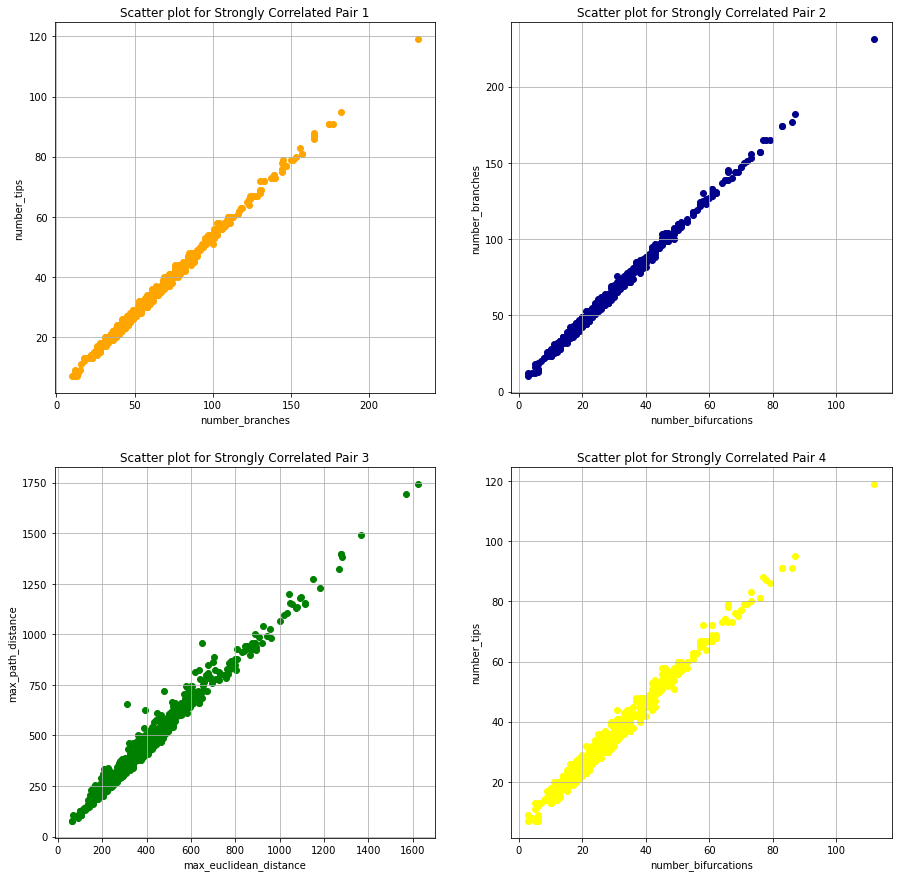

In [69]:
#Plotting scatter plots of all four strongly correlated pairs identified in (c) in 2x2 form
plt.rcParams["figure.figsize"] = (15,15)

plt.subplot(2,2,1)
plt.scatter(GroupData['number_branches'], GroupData['number_tips'],color='orange')
plt.title("Scatter plot for Strongly Correlated Pair 1")
plt.xlabel('number_branches')
plt.ylabel('number_tips')
plt.grid()

plt.subplot(2,2,2)
plt.scatter(GroupData['number_bifurcations'], GroupData['number_branches'],color='darkblue')
plt.title("Scatter plot for Strongly Correlated Pair 2")
plt.xlabel('number_bifurcations')
plt.ylabel('number_branches')
plt.grid()


plt.subplot(2,2,3)
plt.scatter(GroupData['max_euclidean_distance'], GroupData['max_path_distance'],color='green')
plt.title("Scatter plot for Strongly Correlated Pair 3")
plt.xlabel('max_euclidean_distance')
plt.ylabel('max_path_distance')
plt.grid()

plt.subplot(2,2,4)
plt.scatter(GroupData['number_bifurcations'], GroupData['number_tips'],color='yellow')
plt.title("Scatter plot for Strongly Correlated Pair 4")
plt.xlabel('number_bifurcations')
plt.ylabel('number_tips')
plt.grid()


*Above plots represents the scatter plots between the strongly correlated pairs as we got in above question*

**=====================================================================================**

**QUESTION-4**

**Linear regression to predict the total surface area of a neuron (total surface).
(Remaining morphological measurements to be used as predictor variables.)**

**(a) Separate the data into response and predictor variables and standardise the predictor variables.**

In [21]:
#We will need to convert the Predicted variable and Response Variable into a DataFrame and Series respectively. 
X = modifiedGroupData.drop(['total_surface','id'],axis=1)
y = modifiedGroupData['total_surface']

In [22]:
#Standardise our Predicted Variable
X_std = (X - X.mean())/X.std()

**(b) Fit a linear regression model and interpret the fitted model.**

In [23]:
#Inserting 'intercept' column at the front of the Standardised form of dataset
X_std.insert(0,'intercept',1)

In [24]:
#Fitting the Ordinary least squares(OLS) regression model
r = sm.OLS(y,X_std)
reg = r.fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          total_surface   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     4465.
Date:                Sun, 11 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:05:39   Log-Likelihood:                -5362.3
No. Observations:                 694   AIC:                         1.076e+04
Df Residuals:                     675   BIC:                         1.085e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
intercept 

*The above is the summary of the fitted Ordinary least squares(OLS) regression model of the total combined Dataset of the neurons. It has R-Squared, AIC,BIC,Standard Error, t-score, p-value,F-Statistics and so on parameters for each measurements of neurons in the dataset*

**(c) Perform a forward selection Akaike Information Criterion (AIC) regression. Exam- ine the selected model and discuss your findings in relation to the model fitted in part (b).**

In [79]:
#Function for calculating Forward Section AIC Regression
ModelToBeSelected = []
Values = []
CurrentAICValue = 99999999
def ForwardAICRegressionSelectedModels(columns):
    MinimumAICValue = 99999999
    VariableToBeSelected = ''
    for column in columns:
        AValue = sm.OLS(y, X_std.loc[:, X_std.columns.isin(ModelToBeSelected + [column])]).fit().aic
        if  AValue < MinimumAICValue:
            VariableToBeSelected = column
            MinimumAICValue = AValue
    return VariableToBeSelected, MinimumAICValue

#Calling the function and appending the values to the array taken
cols = list(X_std.columns)
while len(cols) > 0:
    Variable, AICValue = ForwardAICRegressionSelectedModels(cols)
    if (AICValue >= CurrentAICValue):
        break
    CurrentAICValue = AICValue
    ModelToBeSelected.append(Variable)
    Values.append(AICValue)
    cols.remove(Variable)
    
#Printing the models that are appended in a array
for i in range (0,len(ModelToBeSelected)):
    print('The Selected Model',(i+1),ModelToBeSelected[i],'has AIC Value: ',Values[i])

The Selected Model 1 total_volume has AIC Value:  14036.328888500182
The Selected Model 2 intercept has AIC Value:  12306.223379559455
The Selected Model 3 total_length has AIC Value:  11194.664393695171
The Selected Model 4 average_diameter has AIC Value:  10824.72282714015
The Selected Model 5 overall_depth has AIC Value:  10795.120165893013
The Selected Model 6 number_stems has AIC Value:  10787.733152021312
The Selected Model 7 number_nodes has AIC Value:  10782.40374765715
The Selected Model 8 soma_surface has AIC Value:  10780.25721929229
The Selected Model 9 average_parent_daughter_ratio has AIC Value:  10778.714186352769
The Selected Model 10 average_contraction has AIC Value:  10777.410904675626
The Selected Model 11 number_bifurcations has AIC Value:  10776.348885866755
The Selected Model 12 average_fragmentation has AIC Value:  10769.885551082605
The Selected Model 13 overall_width has AIC Value:  10768.464584578278


*By using forward selection Akaike Information Criterion (AIC) regression, we are selecting 13 models based on the OLS regression fitted and those selected models are printed with AIC values.*

**(d) Perform a forward selection Bayes Information Criterion (BIC) regression. Examine the selected model and discuss your findings in relation to the models fitted in part (b) and (c).**

In [81]:
#Function for calculating Forward Section BIC Regression
ModelToBeSelected = []
Values = []
CurrentBICValue = 99999999
def ForwardBICRegressionSelectedModels(columns):
    MinimumBICValue = 99999999
    VariableToBeSelected = ''
    for column in columns:
        AValue = sm.OLS(y, X_std.loc[:, X_std.columns.isin(ModelToBeSelected + [column])]).fit().bic
        if  AValue < MinimumBICValue:
            VariableToBeSelected = column
            MinimumBICValue = AValue
    return VariableToBeSelected, MinimumBICValue

#Calling the function and appending the values to the array taken
cols = list(X_std.columns)
while len(cols) > 0:
    Variable, BICValue = ForwardBICRegressionSelectedModels(cols)
    if (BICValue >= CurrentBICValue):
        break
    CurrentBICValue = BICValue
    ModelToBeSelected.append(Variable)
    Values.append(BICValue)
    cols.remove(Variable)

#Printing the models that are appended in a array
for i in range (0,len(ModelToBeSelected)):
    print('The Selected Model',(i+1),ModelToBeSelected[i],'has BIC Value: ',Values[i])

The Selected Model 1 total_volume has BIC Value:  14040.87136046069
The Selected Model 2 intercept has BIC Value:  12315.308323480469
The Selected Model 3 total_length has BIC Value:  11208.291809576693
The Selected Model 4 average_diameter has BIC Value:  10842.892714982176
The Selected Model 5 overall_depth has BIC Value:  10817.832525695547
The Selected Model 6 number_stems has BIC Value:  10814.987983784353
The Selected Model 7 number_nodes has BIC Value:  10814.201051380698


*By using forward selection Bayes Information Criterion (BIC) regression, we are selecting 7 models based on the OLS regression fitted and those selected models are printed with BIC values.*

**(e) Explain how using BIC for model selection differs from using AIC.**

**Akaike's Information Criteria,AIC:-**

*Akaike's Information Criteria were introduced in 1973. When employing Akaike's Information Criteria, which frequently seeks out unidentified models with high dimensional realities, the penalty for additional parameters is reduced. Because it lacks consistency, Akaike's Information Criteria cannot be used to make cross-validation asymptotically identical. At higher levels, AIC shows less tolerance and does not punish free parameters hard.*

**Bayesian's Information Criteria,BIC:-**

*The Bayesian Information Criteria were developed in 1978. The penalty for additional parameters is larger in Bayesian Information Criteria. Only True models are discovered when using the Bayesian Information Criteria. Bayesian information criteria are consistently applied. Although BIC is more forgiving than AIC, the Bayesian Information Criteria are helpful for trustworthy estimates. The BIC more harshly penalizes free parameters.*

**=====================================================================================**

**QUESTION-5**

**Random forest regression to predict the total surface area of a neuron (total surface).
(Remaining morphological measurements to be used as predictor variables.)**

**(a) Split the data into appropriate training and test sets.**

In [41]:
#We will need to convert the Predicted variable and Response Variable into a DataFrame and Series respectively. 
X = modifiedGroupData.drop(['total_surface','id'],axis=1)
y = modifiedGroupData['total_surface']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

**(b) Fit a random forest regression model with 10 trees using the training data. Include the argument random state=101 in the random forest regression function to ensure reproducible results. Determine which variables are most important in predicting the total surface area of a neuron. Discuss your findings in relation to the linear models fit in question 4.**

In [45]:
#Fitting the RandomForestRegressor with 10 trees and Random_state as 101 to the model
RFR = RandomForestRegressor(n_estimators=10,random_state = 101)
RFR.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=101)

**Determine which variables are most important in predicting the total surface area of a neuron**

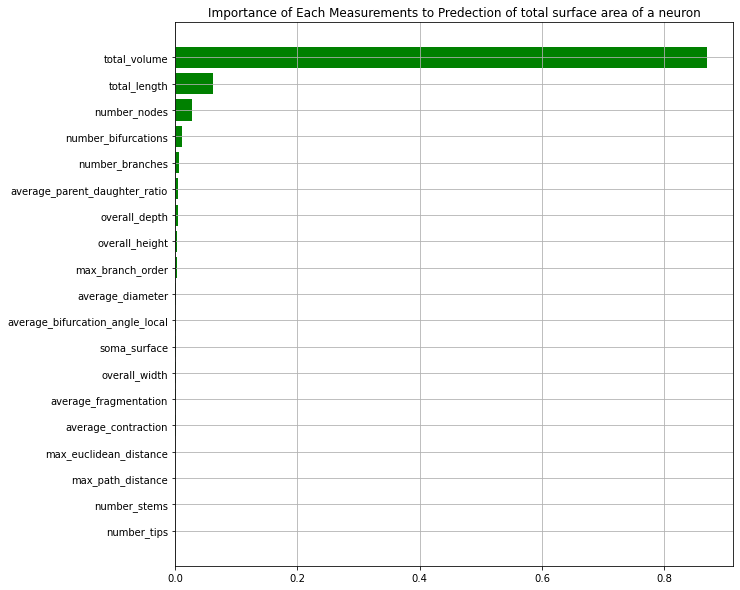

In [88]:
#Finding the how much importance a variable depends on predicting Total surface area of a neuron 
#in the dataset
ColumnNames = list(X.columns.values)
List = list(zip(ColumnNames,RFR.feature_importances_))
List.sort(key = lambda x:x[1])
f = plt.figure(figsize = (10,10))
plt.barh([i[0] for i in List],[i[1] for i in List],color = 'Green')
plt.title("Importance of Each Measurements to Predection of total surface area of a neuron")
plt.grid()
plt.show()

*The Top Measurements of neurons with most important in predicting the total surface area of a neuron is Total_Neurons, Total_Length, Number_nodes, Number_Bifurcations*

**(c) Use the random forest regression model to predict the total surface area of a neuron for the test set. Create a scatter plot of the true surface area of a neuron versus the predicted surface area. Interpret your plot.**

Text(0, 0.5, 'Predicted set of data of surface area of neuron')

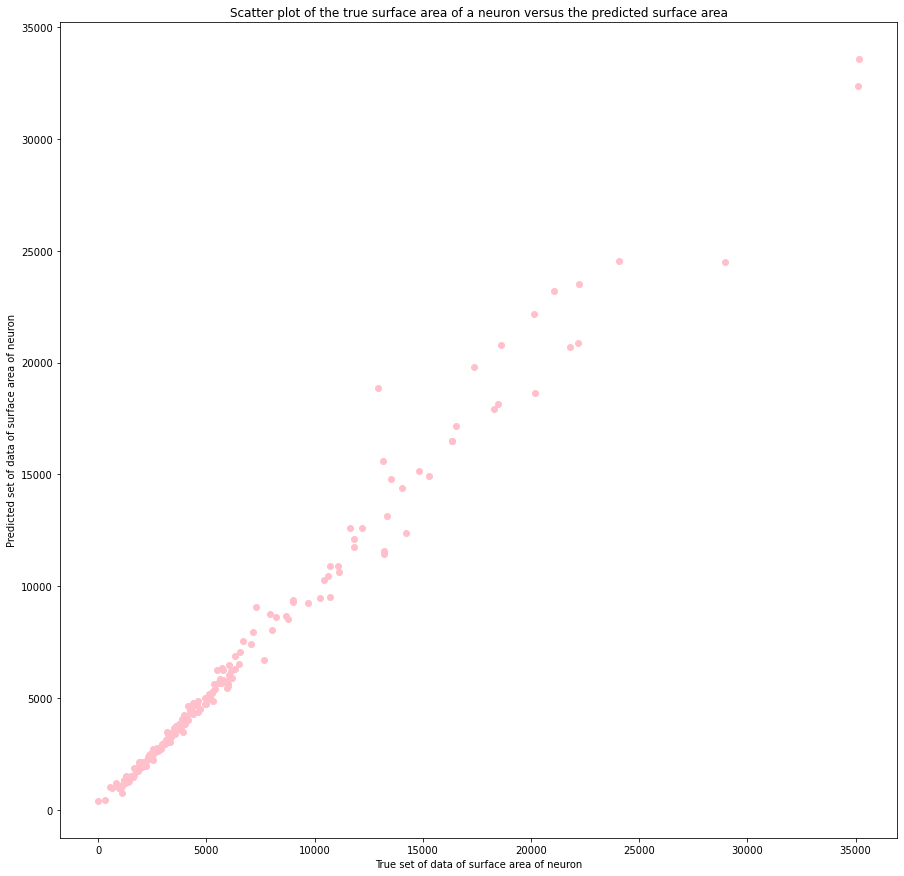

In [90]:
#Predicting the test variable which has been splited using RandomForestRegression
Pred_y = RFR.predict(X_test)

#Printing the scatter plot of the true surface area of a neuron versus the predicted surface area.
plt.scatter(y_test,Pred_y,color="pink")
plt.title("Scatter plot of the true surface area of a neuron versus the predicted surface area")
plt.xlabel("True set of data of surface area of neuron")
plt.ylabel("Predicted set of data of surface area of neuron")

*The above is the scatter plot of the true surface area of a neuron versus the predicted surface area.*

**(d) Assess the performance of a random forest regression model with 5, 10, 20, 50, 100, 200, 500 and 1000 trees in predicting the total surface area of a neuron. You should repeat the model fit and prediction 30 times for each number of trees, using a different random state for each repeat. Create a plot of the model performance as a function of the number of trees (use a log axis for the number of trees). The plot should show the mean and standard error of the performance metric for each number of trees. Discuss your findings.**

In [145]:
#Set of Trees of Random Forest Regression given in the question
Trees = [5,10,20,50,100,200,500,1000]

#Function to fit the Random Forest Regression with different values of
#trees and random state by running 30 times and storing the score of model Function
def tree_p(Trees):
    p = []
    for i in range(1,30):
        RFR_1 = RandomForestRegressor(n_estimators=Trees)
        RFR_1.fit(X_train,y_train)
        PreditedValues = RFR_1.predict(X_test)
        p.append(mean_squared_error(y_test,PreditedValues))
    return p

#Storing the value of the score in res
res = []
for u in Trees:
    res.append(tree_p(u))

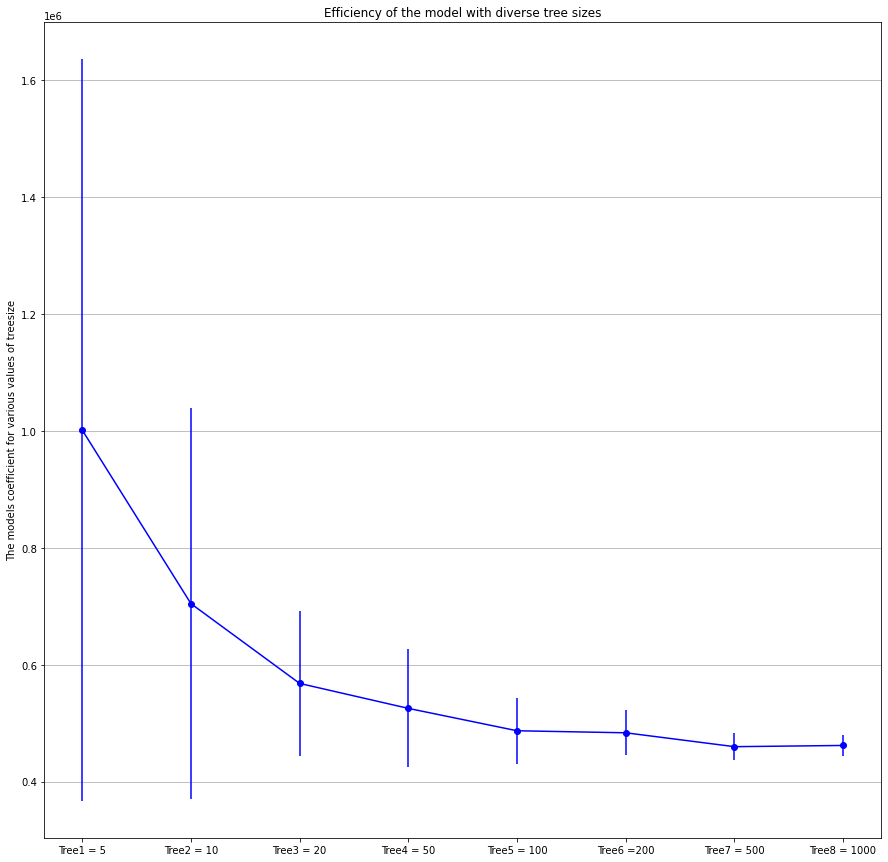

In [150]:
#The plot should show the mean and standard error of the performance metric for each number of trees.
lbs = ['Tree1 = 5','Tree2 = 10','Tree3 = 20','Tree4 = 50','Tree5 = 100','Tree6 =200','Tree7 = 500','Tree8 = 1000']
x = np.arange(len(lbs))
q = []
w = []
for l in res:
    q.append(np.mean(l))
    w.append(np.std(l))
fig,a = plt.subplots()
a.errorbar(x,q,yerr=w,color='blue',marker='o')
a.set_ylabel('The models coefficient for various values of treesize')
a.set_xticks(x)
a.set_xticklabels(lbs)
a.set_title('Efficiency of the model with diverse tree sizes')
a.yaxis.grid(True)
plt.show()

*The figure showed how the model's demonstrated significant with the number of trees. The productivity metric's mean and standard error for each number of trees were used in the plot's design. Since the prediction accuracy has barely changed, it is nearly 99%. It begins to rise from 97.777% and rises to a steady value and get constant of 98.667% between 500 and 1000 trees.As we increase the size of tree the model function performance will be constant*

**(e) Explain the rationale for fitting the model multiple time with different random states.**

*From the above, we can see that the performance of the chosen model improves as the value of the tree's size is increased using various random states over several runs. From the foregoing, when we run the score of the fitted model, we obtain a new set of performance accuracy. If you run it more than once, there may be a very slight variation of 0.001%. However, the percentage numbers continue to rise and reach a steady level of about 99%.*

**=====================================================================================**

**QUESTION-6**

**(a) Perform a k-means cluster analysis, using the morphological measurements as the features. Run the clustering algorithm for different numbers of clusters (integers from 1 to 10). Plot the model performance as a function of the number of clusters and identify the optimal number of clusters for this data.**

Text(0.5, 1.0, 'Graph to tell Optimal K')

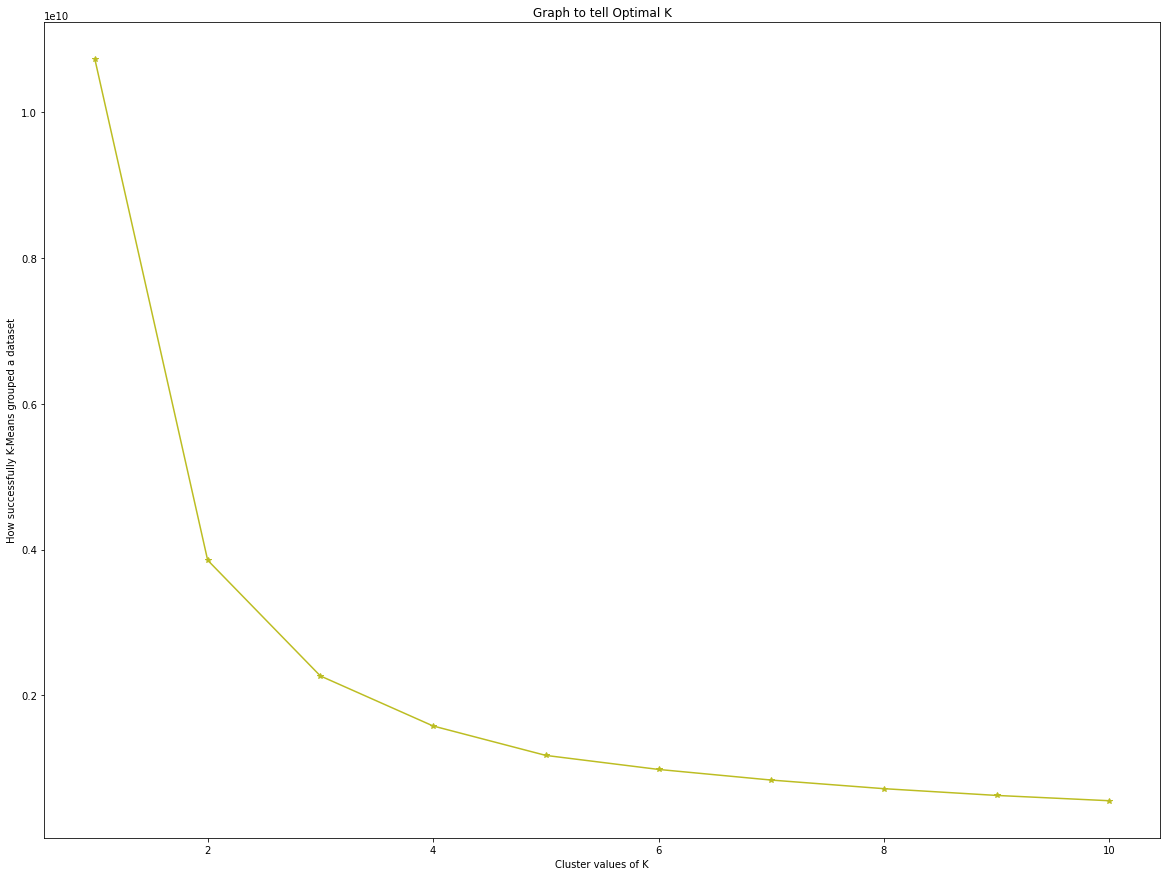

In [238]:
#Calculate the Optimal Number of cluster K
number = []
clusters = [1,2,3,4,5,6,7,8,9,10]
for i in clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    number.append(model.inertia_)

plt.plot(clusters, number,color='#bcbd22',marker='*')
plt.ylabel('How successfully K-Means grouped a dataset')
plt.xlabel('Cluster values of K')
plt.title('Graph to tell Optimal K')

*It is evident from the diagram that the slope at K = 2 changed. It implies that the inclination before and after k=2 are not identical. It serves as a trigger. Consequently, it is the data's optimal cluster (k = 2)*

**(b) Perform a k-means cluster analysis, using the optimal number of clusters (identified in part (a)), and identify the most discriminatory variables.
(Hint: Create histograms for each variable, with the data separated by cluster.)**

In [156]:
#Performing K-Cluster Analysis
model = KMeans(n_clusters=2)
model.fit(X_train)
pred = model.predict(X_train)

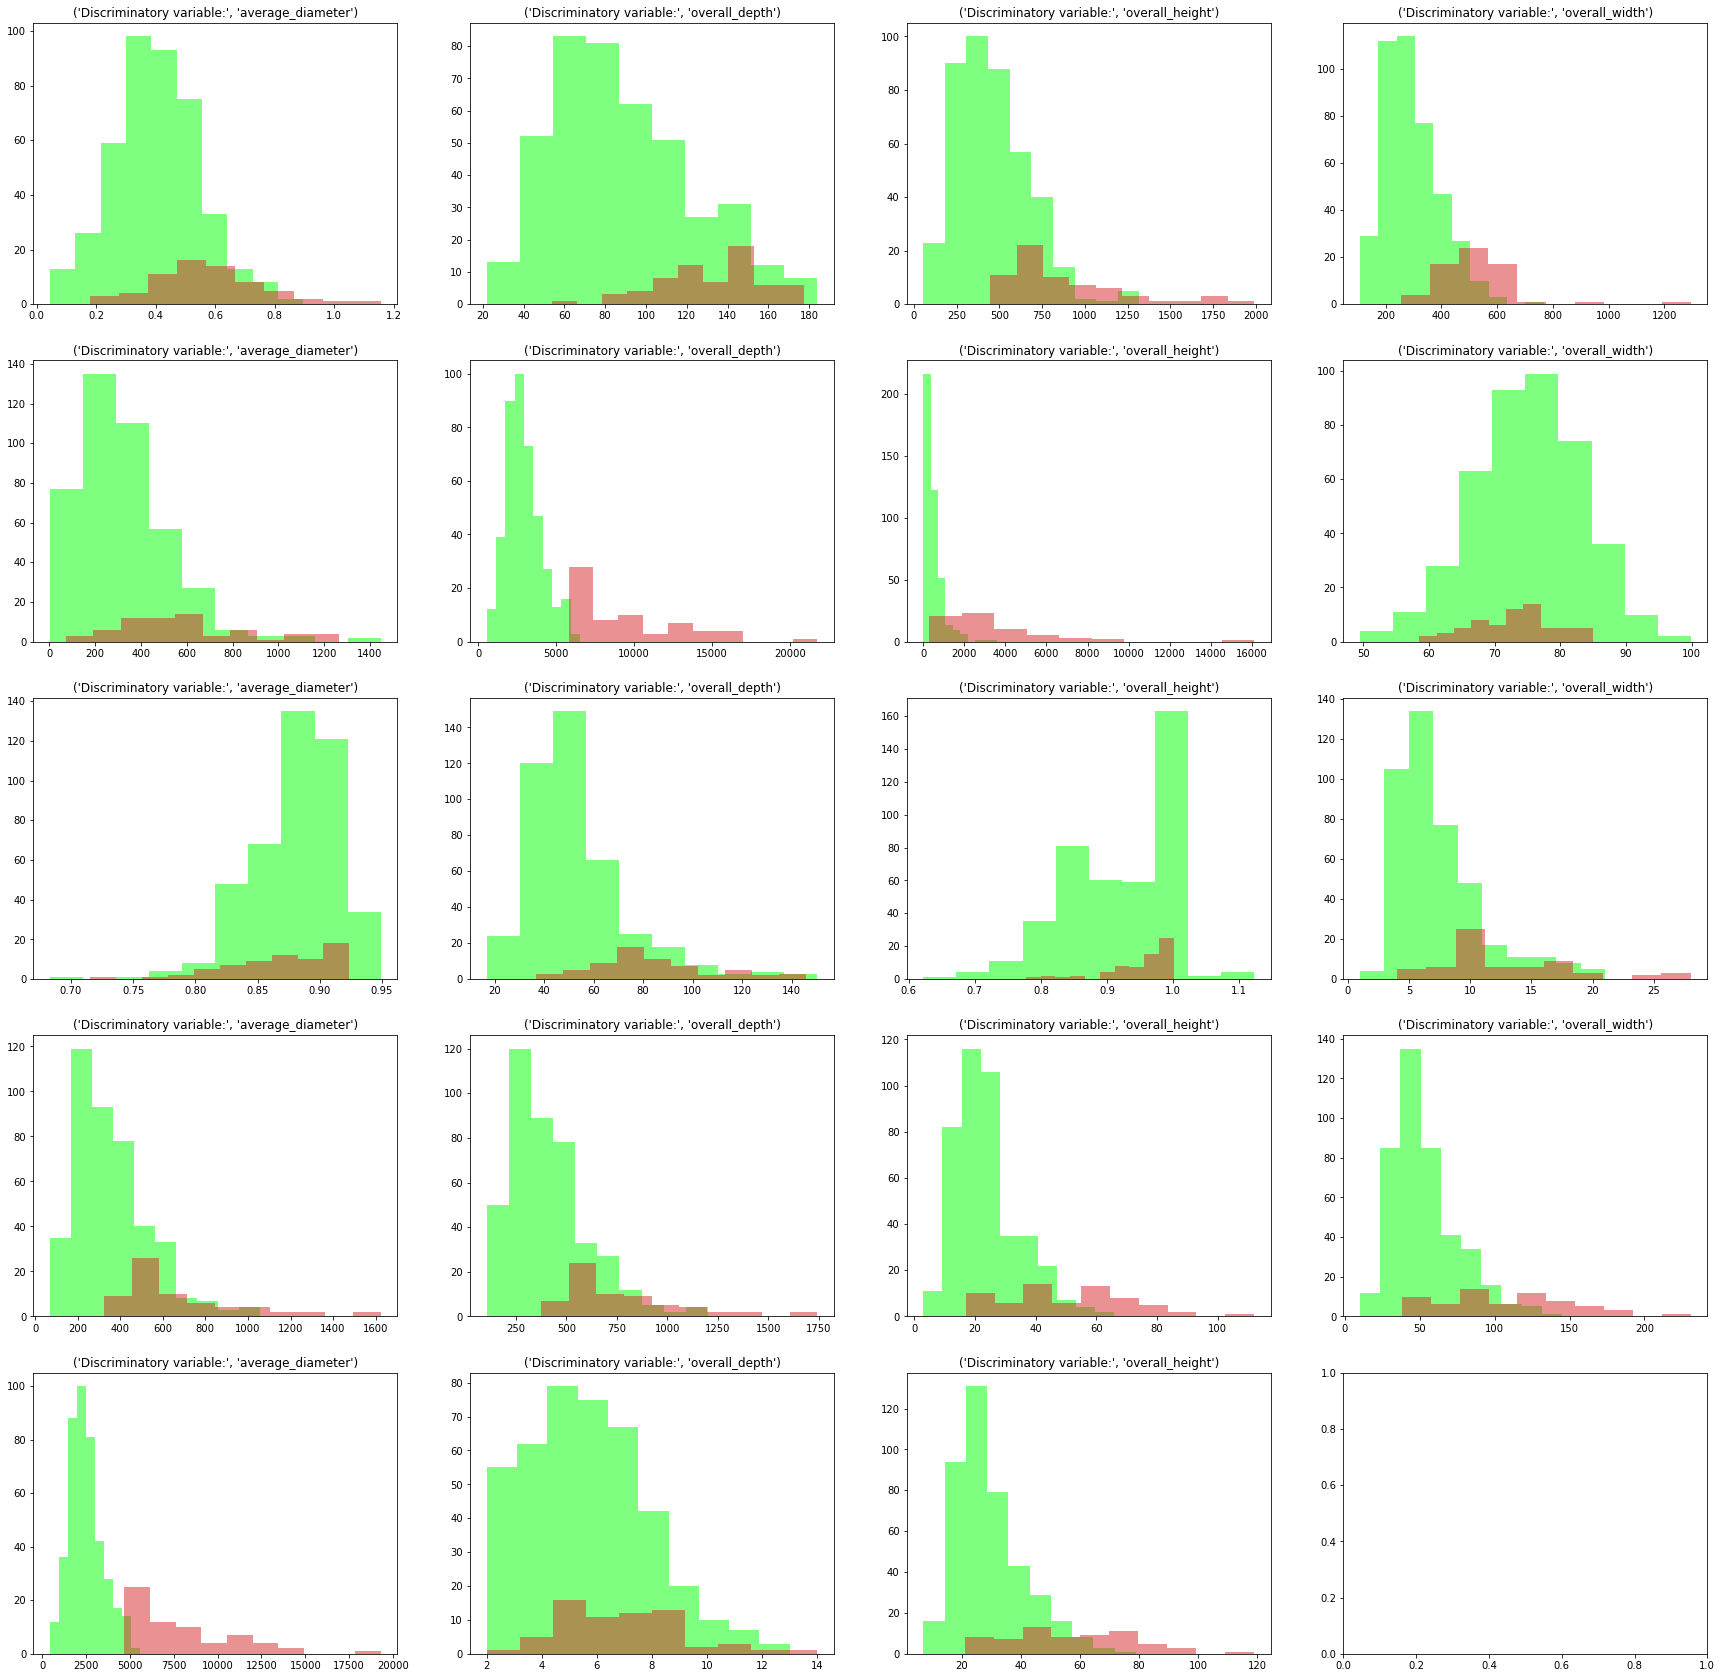

In [206]:
Fgr,g = plt.subplots(5,4)
ftr = list(X_train.columns)
m = 0
for b in range(0,5):
    for n in range(0,4):
        if(m>=19):
            break
        tit = ('Discriminatory variable:',ftr[n])
        Comparision(b,n,m,tit)
        m += 1
#Function to identify the most discriminatory variables
def Comparision(u,i,feind,tit):
    inds = []
    Clusters = []
    plt.subplot(5,4,1)
    for l in range(len(pred)):
        if pred[l] == 0:
            inds.append(l)
        else:
            Clusters.append(l)
    g[u,i].title.set_text(tit)
    g[u,i].hist(X_train.iloc[inds,feind],alpha=0.5,color='#00FF00')
    g[u,i].hist(X_train.iloc[Clusters,feind],alpha=0.5,color='#d62728')
Fgr.set_figheight(30)
Fgr.set_figwidth(30)
plt.show()

**We can find the parameters of the neuron that are taken in dataset which are most discerning from plots. They are:**

A. **"Overall height"**  

B. **"Total length"**  

C. **"Total volume"** 

D. **"Number of nodes"** 



**(c) Create a series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Discuss your findings. Do your findings support the claim that multiple categories of neurons, with distinctly different morphological properties, are included in this dataset?**

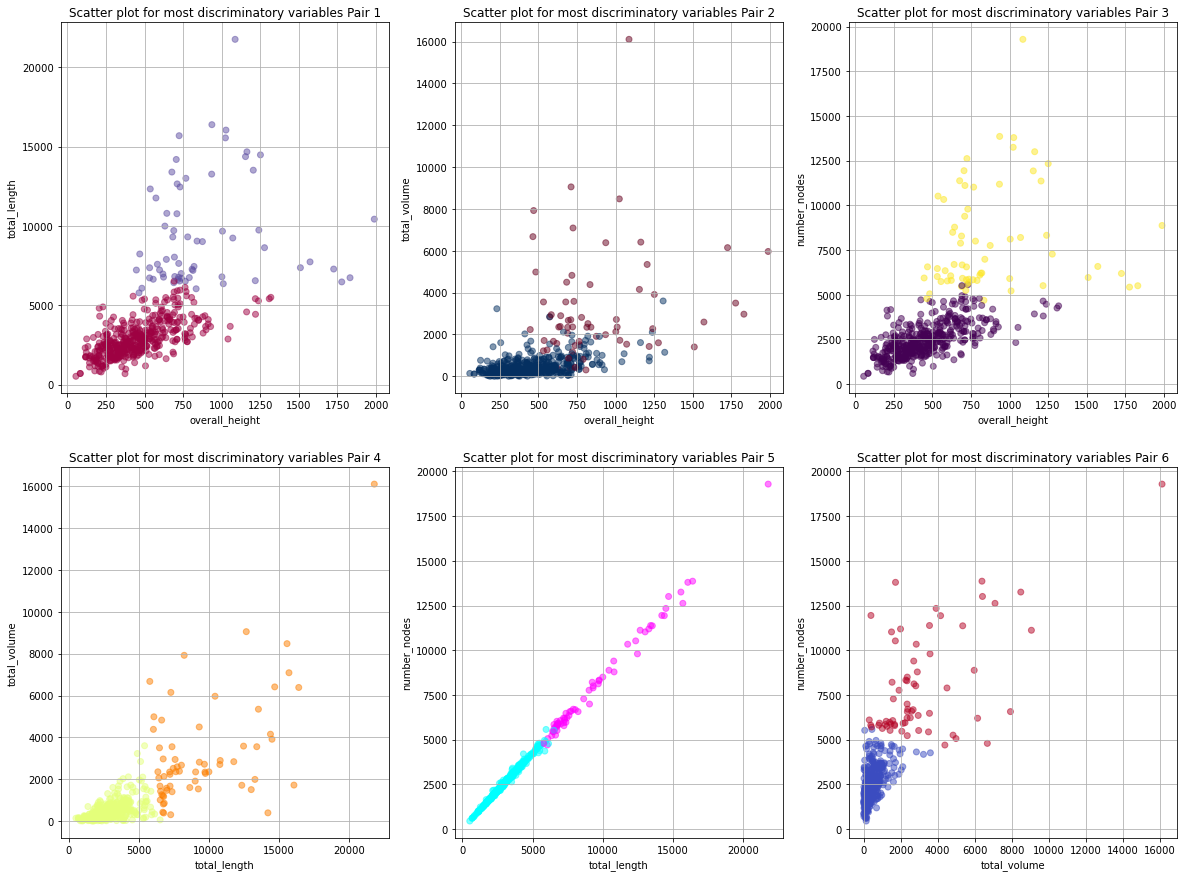

In [232]:
#Plotting scatter plots of all most discriminatory variables
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(2,3,1)
plt.scatter(X_train.loc[:,'overall_height'], X_train.loc[:,'total_length'], c = pred,alpha = 0.5,cmap='Spectral')
plt.title("Scatter plot for most discriminatory variables Pair 1")
plt.xlabel('overall_height')
plt.ylabel('total_length')
plt.grid()

plt.subplot(2,3,2)
plt.scatter(X_train.loc[:,'overall_height'], X_train.loc[:,'total_volume'], c = pred,alpha = 0.5,cmap='RdBu_r')
plt.title("Scatter plot for most discriminatory variables Pair 2")
plt.xlabel('overall_height')
plt.ylabel('total_volume')
plt.grid()

plt.subplot(2,3,3)
plt.scatter(X_train.loc[:,'overall_height'], X_train.loc[:,'number_nodes'], c = pred,alpha = 0.5)
plt.title("Scatter plot for most discriminatory variables Pair 3")
plt.xlabel('overall_height')
plt.ylabel('number_nodes')
plt.grid()

plt.subplot(2,3,4)
plt.scatter(X_train.loc[:,'total_length'], X_train.loc[:,'total_volume'], c = pred,alpha = 0.5,cmap='Wistia')
plt.title("Scatter plot for most discriminatory variables Pair 4")
plt.xlabel('total_length')
plt.ylabel('total_volume')
plt.grid()

plt.subplot(2,3,5)
plt.scatter(X_train.loc[:,'total_length'], X_train.loc[:,'number_nodes'], c = pred,alpha = 0.5,cmap='cool')
plt.title("Scatter plot for most discriminatory variables Pair 5")
plt.xlabel('total_length')
plt.ylabel('number_nodes')
plt.grid()

plt.subplot(2,3,6)
plt.scatter(X_train.loc[:,'total_volume'], X_train.loc[:,'number_nodes'], c = pred,alpha = 0.5,cmap='coolwarm')
plt.title("Scatter plot for most discriminatory variables Pair 6")
plt.xlabel('total_volume')
plt.ylabel('number_nodes')
plt.grid()

*The Above is the series of scatter plots for the most discriminatory variables, colouring the points by cluster number. Here generated the 6 set of series of scatter plots of the training dataset.*

**(d) Identify another clustering algorithm that may be suitable for this data. Give an overview of your chosen algorithm and discuss the type of problems it works best for. Repeat part (a)–(c) using your chosen algorithm. Discuss your results in relation to those from the k-means cluster analysis.**

**DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Algorithm:**

Clusters are seen by the DBSCAN algorithm as regions of high density surrounded by regions of low density. Due to this more open-ended perspective, DBSCAN clusters can be of any shape, unlike k-means, which requires that clusters are convex in shape. Core samples, or samples found in densely populated locations, are the fundamental idea behind the DBSCAN. Consequently, a cluster is made up of a collection of core samples that are close to one another (as determined by some distance metric) and a collection of non-core samples that are close to a core sample (but are not themselves core samples).

In [233]:
#Performing K-Cluster Analysis
model = KMeans(n_clusters=2)
model.fit(X_train)
pred = model.predict(X_train)

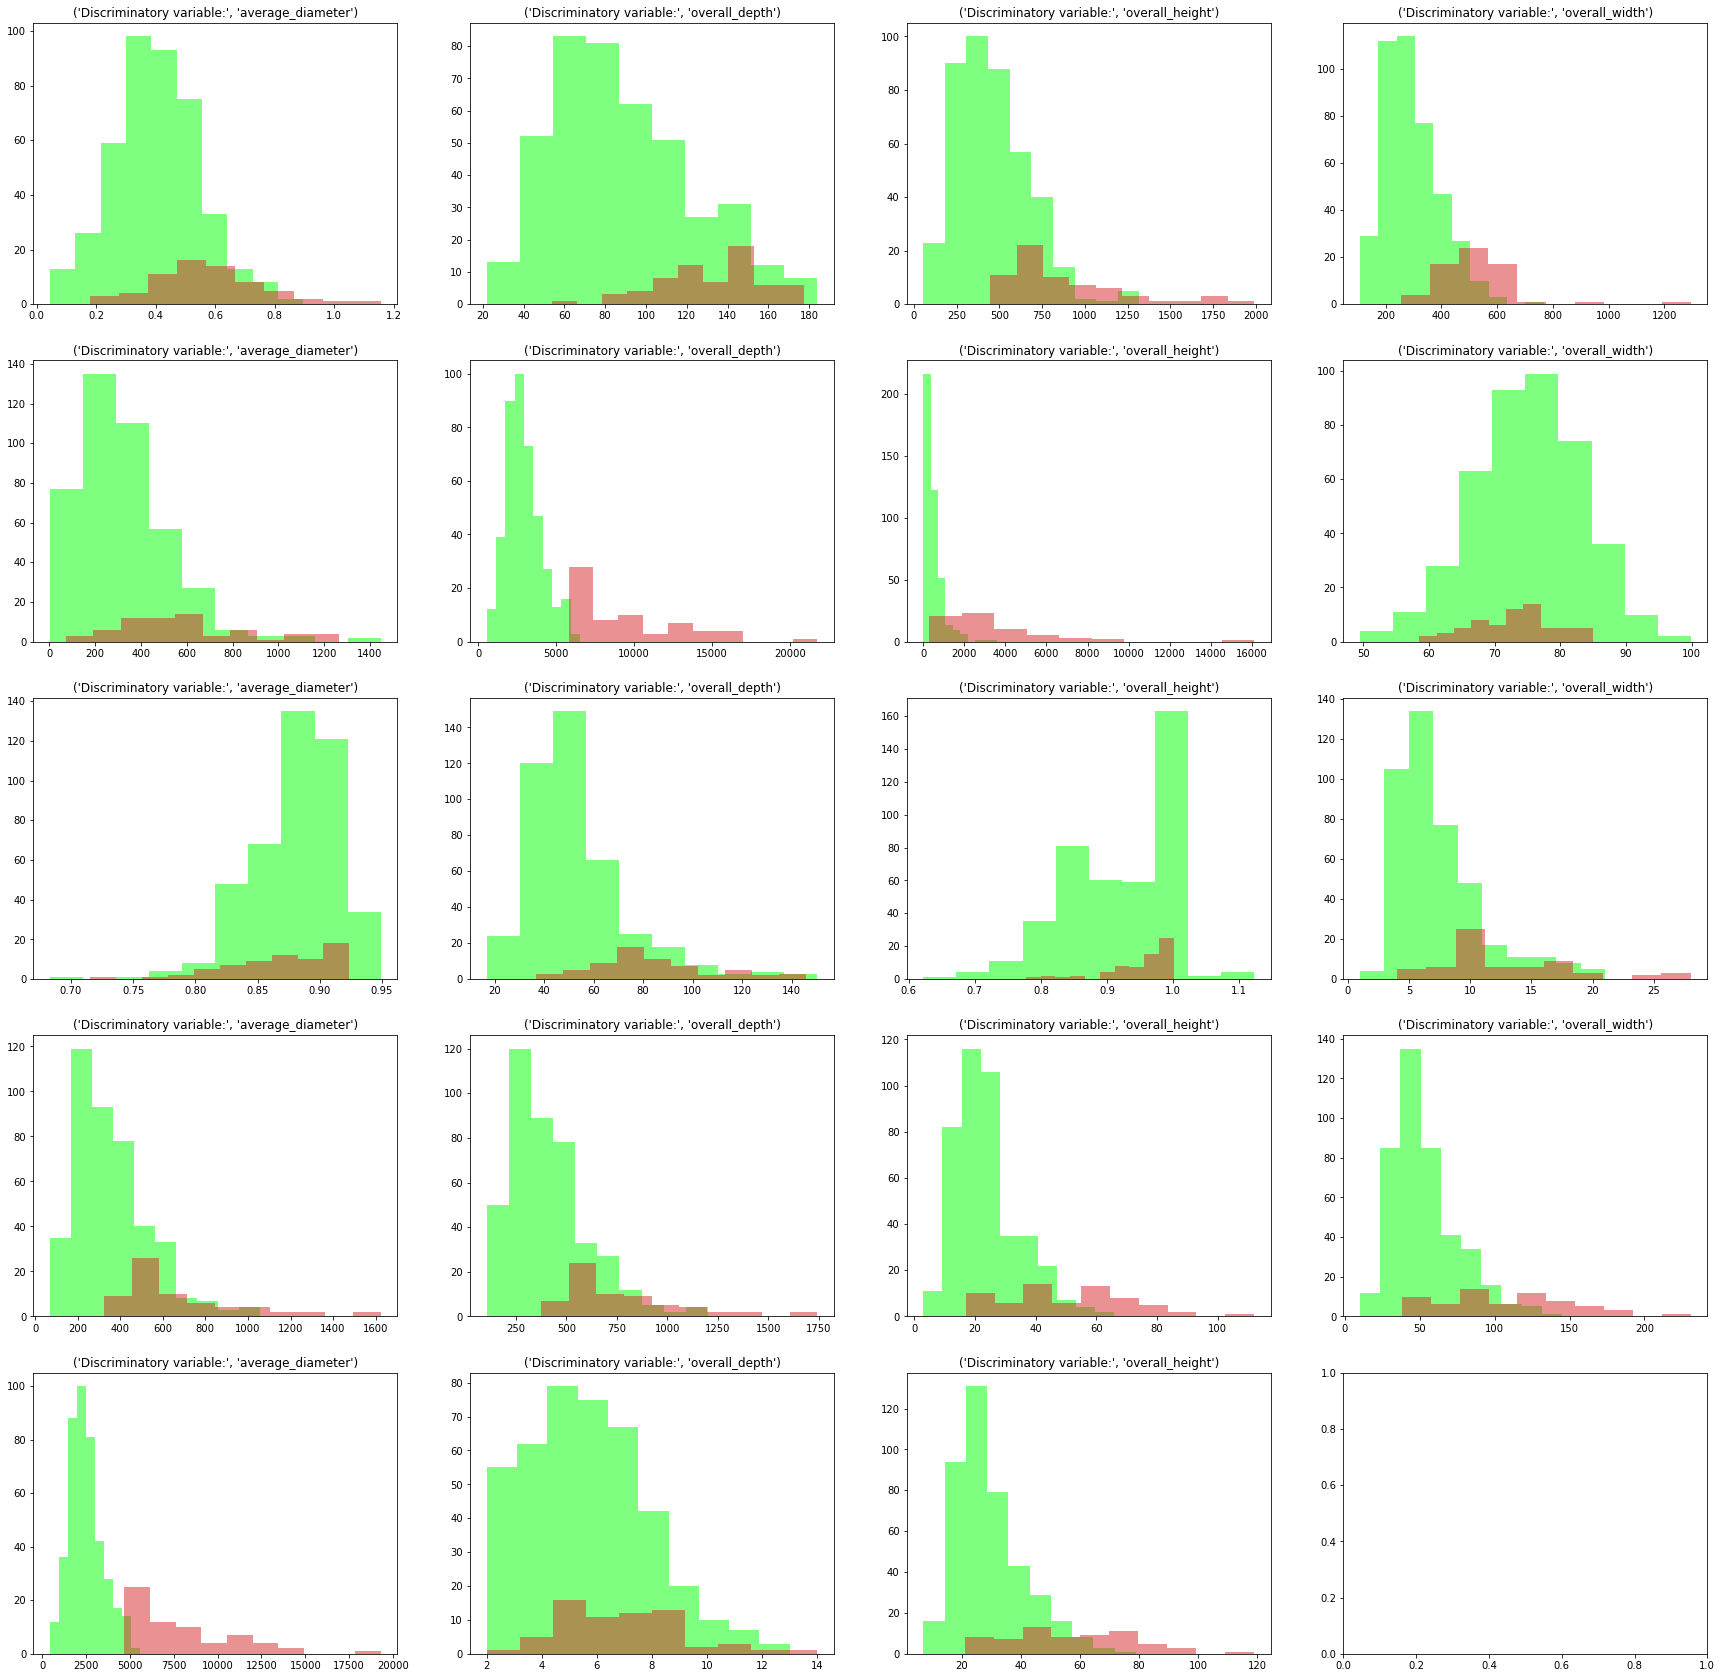

In [234]:
Fgr,g = plt.subplots(5,4)
ftr = list(X_train.columns)
m = 0
for b in range(0,5):
    for n in range(0,4):
        if(m>=19):
            break
        tit = ('Discriminatory variable:',ftr[n])
        Comparision(b,n,m,tit)
        m += 1
#Function to identify the most discriminatory variables
def Comparision(u,i,feind,tit):
    inds = []
    Clusters = []
    plt.subplot(5,4,1)
    for l in range(len(pred)):
        if pred[l] == 0:
            inds.append(l)
        else:
            Clusters.append(l)
    g[u,i].title.set_text(tit)
    g[u,i].hist(X_train.iloc[inds,feind],alpha=0.5,color='#00FF00')
    g[u,i].hist(X_train.iloc[Clusters,feind],alpha=0.5,color='#d62728')
Fgr.set_figheight(30)
Fgr.set_figwidth(30)
plt.show()

**We can find the parameters of the neuron that are taken in dataset which are most discerning from plots. They are:**

A. **"Overall height"**  

B. **"Total length"**  

C. **"Total volume"** 

D. **"Number of nodes"** 

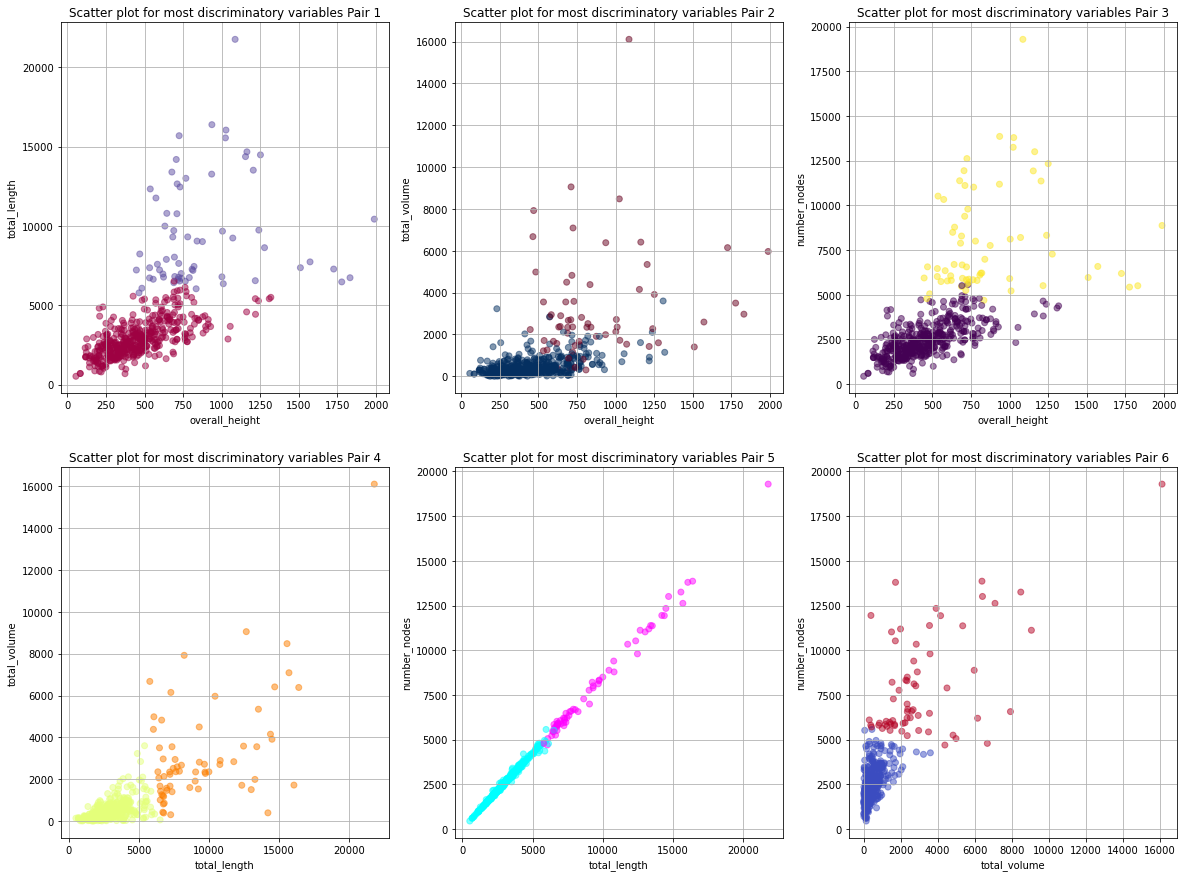

In [235]:
#Plotting scatter plots of all most discriminatory variables
plt.rcParams["figure.figsize"] = (20,15)

plt.subplot(2,3,1)
plt.scatter(X_train.loc[:,'overall_height'], X_train.loc[:,'total_length'], c = pred,alpha = 0.5,cmap='Spectral')
plt.title("Scatter plot for most discriminatory variables Pair 1")
plt.xlabel('overall_height')
plt.ylabel('total_length')
plt.grid()

plt.subplot(2,3,2)
plt.scatter(X_train.loc[:,'overall_height'], X_train.loc[:,'total_volume'], c = pred,alpha = 0.5,cmap='RdBu_r')
plt.title("Scatter plot for most discriminatory variables Pair 2")
plt.xlabel('overall_height')
plt.ylabel('total_volume')
plt.grid()

plt.subplot(2,3,3)
plt.scatter(X_train.loc[:,'overall_height'], X_train.loc[:,'number_nodes'], c = pred,alpha = 0.5)
plt.title("Scatter plot for most discriminatory variables Pair 3")
plt.xlabel('overall_height')
plt.ylabel('number_nodes')
plt.grid()

plt.subplot(2,3,4)
plt.scatter(X_train.loc[:,'total_length'], X_train.loc[:,'total_volume'], c = pred,alpha = 0.5,cmap='Wistia')
plt.title("Scatter plot for most discriminatory variables Pair 4")
plt.xlabel('total_length')
plt.ylabel('total_volume')
plt.grid()

plt.subplot(2,3,5)
plt.scatter(X_train.loc[:,'total_length'], X_train.loc[:,'number_nodes'], c = pred,alpha = 0.5,cmap='cool')
plt.title("Scatter plot for most discriminatory variables Pair 5")
plt.xlabel('total_length')
plt.ylabel('number_nodes')
plt.grid()

plt.subplot(2,3,6)
plt.scatter(X_train.loc[:,'total_volume'], X_train.loc[:,'number_nodes'], c = pred,alpha = 0.5,cmap='coolwarm')
plt.title("Scatter plot for most discriminatory variables Pair 6")
plt.xlabel('total_volume')
plt.ylabel('number_nodes')
plt.grid()

*On applying DBSCAN algorithm, we got the same result*